In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15,12]

# to make this notebook's output stable across runs
np.random.seed(42)

# Data Preperation 

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

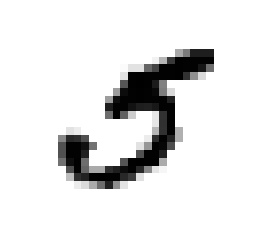

5.0

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = 'nearest')
plt.axis("off")
plt.show()
y[36000]

In [6]:
X_train,X_test,y_train,y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
display(shuffle_index)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

display(X_train, y_train)

array([12628, 37730, 39991, ...,   860, 15795, 56422])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([1., 6., 6., ..., 0., 2., 9.])

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
display(y_train_5)
display(y_test_5)

array([False, False, False, ..., False, False, False])

array([False, False, False, ..., False, False, False])

# Classification

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

In [ ]:
y_train_never_5_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_never_5_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score
display(precision_score(y_train_5, y_train_pred))
display(recall_score(y_train_5, y_train_pred))

display(precision_score(y_train_5, y_train_never_5_pred))
display(recall_score(y_train_5, y_train_never_5_pred))

In [ ]:
from sklearn.metrics import f1_score
display(f1_score(y_train_5, y_train_pred))
display(f1_score(y_train_5, y_train_never_5_pred))

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
display(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
list(map(len, [precisions, recalls, thresholds]))

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
y_train_pred_90 = (y_scores > 70000)
display(precision_score(y_train_5, y_train_pred_90))
display(recall_score(y_train_5, y_train_pred_90))

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
display(y_probas_forest)
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
display(roc_auc_score(y_train_5, y_scores_forest))

In [ ]:
precisions_forest, recalls_forest, thresholds = precision_recall_curve(y_train_5, y_scores_forest)
plt.plot(precisions_forest, recalls_forest)
plt.xlabel("recalls_forest")
plt.ylabel("precisions_forest")
plt.axis([0,1,0,1])
plt.show()

In [ ]:
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds)

In [ ]:
y_train_forest_pred_95 = (y_scores_forest>.5)
display(precision_score(y_train_5, y_train_forest_pred_95))
display(recall_score(y_train_5, y_train_forest_pred_95))

# Multiclass Classification

In [ ]:
display(X_train)
display(y_train)

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
display(some_digit_scores)
display(np.argmax(some_digit_scores))
display(sgd_clf.classes_)
sgd_clf.classes_[np.argmax(some_digit_scores)]

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print(len(ovo_clf.estimators_))
ovo_clf.predict([some_digit])

In [ ]:
display(ovo_clf.estimators_)
display(ovo_clf.classes_)
ovo_clf.decision_function([some_digit])

In [ ]:
forest_clf.fit(X_train, y_train)
display(forest_clf.predict([some_digit]))
forest_clf.predict_proba([some_digit])

In [ ]:
display(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))
display(cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy"))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
display(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))
display(cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

# Exercises

## Problem 1

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
display(knn_clf.predict([some_digit]))
display(knn_clf.classes_)
knn_clf.predict_proba([some_digit])

array([5.])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [9]:
from sklearn.metrics import accuracy_score
y_pred_knn = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9688

In [ ]:
from sklearn.model_selection import GridSearchCV